## WeatherPy

Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 

[OpenWeatherMap API](https://openweathermap.org/api) and a little common sense to create a representative model of weather across world cities.

Objective is to build a series of scatter plots to showcase the following relationships and analyze the behaviors:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


In [309]:
# Import needy libraries 

import pandas as pd
from citipy import citipy
import numpy as np
import requests as req
import matplotlib.pyplot as plt
from api_key import weather

In [310]:
api_key = weather

## Generate Cities List

In [311]:
# Generate Random 500 latitude and longitude

lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

In [312]:
# Get the target url to test it 

# target_url = 'http://samples.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=' + api_key
# print(target_url)

In [313]:
# Define the empty lists 

city_names = []
country_code = []
cloudines = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

## Perform API Calls

In [314]:
# Set up a for loop for 500 random samples

count = 0

for i in range(0,500):
    
    city = citipy.nearest_city(lats[i],lngs[i])
    
    # Append the city and country names to the empty lists 
    
    city_names.append(city.city_name)
    country_code.append((city.country_code).upper())
    
    # Set up the params for the base url
    params = {
    'lat': lats[i],
    'lon': lngs[i],
    'units': 'metric',
    'APPID': api_key
    }
    
    # Set up the base url 
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    response = req.get(base_url, params = params)
    
    response_number = [response.url]
    count = count + len(response_number)
        
    city_weather = response.json()
        
    # Fill up the empty list based on API response from the url 
    cloudines.append(city_weather['list'][0]['clouds']['all'])
    date.append(city_weather['list'][0]['dt'])
    humidity.append(city_weather['list'][0]['main']['humidity'])
    
    lat.append(round(lats[i]))
    lng.append(round(lngs[i]))
    
    max_temp.append(city_weather['list'][0]['main']['temp_max'])
    wind_speed.append(city_weather['list'][0]['wind']['speed'])
    

In [315]:
# Number of Cities in the loop
count

500

In [336]:
# Names of the cities and countries from the random data loop 

for j in range(len(city_names)):
    print(city_names[j]+','+country_code[j])

rocha,UY
mar del plata,AR
matara,LK
tiznit,MA
mar del plata,AR
ponta do sol,PT
castro,CL
ponta do sol,CV
nizhniy kuranakh,RU
itoman,JP
punta arenas,CL
barrow,US
arivonimamo,MG
clyde river,CA
albany,AU
antalaha,MG
smithers,CA
tuktoyaktuk,CA
new norfolk,AU
boone,US
punta arenas,CL
erzin,RU
stornoway,GB
busselton,AU
velykoploske,UA
cockburn town,BS
atuona,PF
marienburg,SR
hithadhoo,MV
saint-augustin,CA
saleaula,WS
shaowu,CN
katsuura,JP
ushuaia,AR
sur,OM
kishtwar,IN
gotsu,JP
amapa,BR
bredasdorp,ZA
rikitea,PF
potsdam,US
bredasdorp,ZA
port macquarie,AU
attawapiskat,CA
pisco,PE
ushuaia,AR
san carlos de bariloche,AR
ushuaia,AR
iqaluit,CA
grand river south east,MU
khatanga,RU
taolanaro,MG
ushuaia,AR
qaanaaq,GL
tuatapere,NZ
ajdabiya,LY
busselton,AU
punta arenas,CL
cherskiy,RU
busselton,AU
iturama,BR
tsihombe,MG
bathsheba,BB
yining,CN
hobart,AU
barentsburg,SJ
rikitea,PF
narsaq,GL
khatanga,RU
yellowknife,CA
mataura,PF
barrow,US
tiksi,RU
rikitea,PF
kodiak,US
albany,AU
hobart,AU
sabang,ID
sentyabrsk

In [339]:
# Create the dictionary

city_data = {
    'City':city_names,
    'Cloudines': cloudines,
    'Country': country_code,
    'Date': date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed': wind_speed,
    }

In [340]:
# Convert the dictionary to a data frame 
city_data = pd.DataFrame(city_data)
city_data.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rocha,36,UY,1510941600,95,-44.0,-47.0,12.23,7.95
1,mar del plata,68,AR,1510941600,98,-58.0,-44.0,0.83,4.85
2,matara,68,LK,1510941600,100,-3.0,83.0,27.83,4.40
3,tiznit,12,MA,1510941600,18,27.0,-8.0,19.50,1.00
4,mar del plata,80,AR,1510941600,86,-45.0,-54.0,14.23,9.85


## Latitude vs Temperature Plot

In [341]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Max Temperature (11/17/2017)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celcius)')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsMaxTemperature')

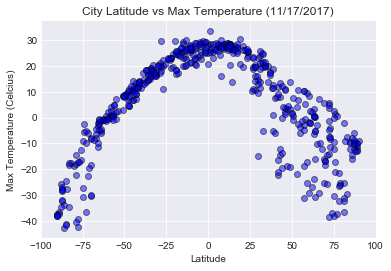

In [342]:
plt.show()

## Latitude vs. Humidity Plot

In [343]:
plt.scatter(city_data['Lat'], city_data['Humidity'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Humidity (11/17/2017)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsHumidity')

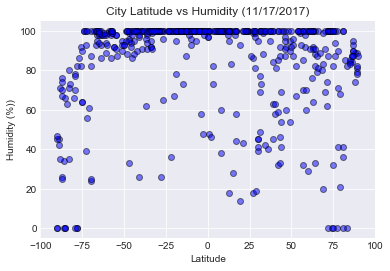

In [344]:
plt.show()

## Latitude vs. Cloudiness Plot

In [337]:
plt.scatter(city_data['Lat'], city_data['Cloudines'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Cloudines (11/17/2017)')
plt.xlabel('Latitude')
plt.ylabel('Cloudines (%))')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsCloudines')

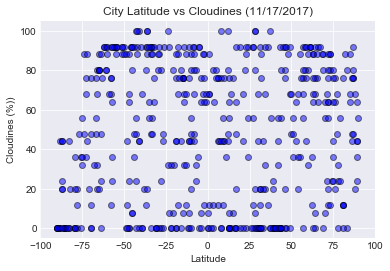

In [338]:
plt.show()

## Latitude vs. Wind Speed Plot

In [334]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Wind Speed (11/17/2017)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsWindSpeed')

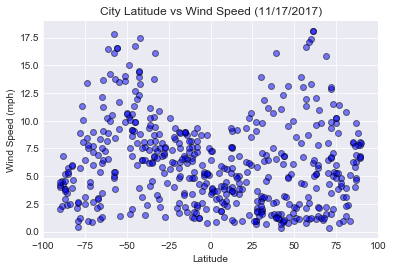

In [335]:
plt.show()